In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

Full dataset description can be found here:

https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names

#  Attribute                     Domain
-- -----------------------------------------
1. Sample code number:           id number
2. Clump Thickness:              1 - 10
3. Uniformity of Cell Size:      1 - 10
4. Uniformity of Cell Shape:     1 - 10
5. Marginal Adhesion:            1 - 10
6. Single Epithelial Cell Size:  1 - 10
7. Bare Nuclei:                  1 - 10
8. Bland Chromatin:              1 - 10
9. Normal Nucleoli:              1 - 10
10. Mitoses:                     1 - 10
11. Class:                       (2 for benign, 4 for malignant)

In [4]:
names = ['thickness', 'UO cell size', 'UO cell shape', 'adhesion', 'SE cell size',
        'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class']
df = pd.read_csv('breast-cancer.csv', names=names, delimiter=',')
df.head()

,thickness,UO cell size,UO cell shape,adhesion,SE cell size,nuclei,chromatin,nucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
print(df.shape)
print(df.dtypes) # strings in 6th column

(699, 10)
thickness         int64
UO cell size      int64
UO cell shape     int64
adhesion          int64
SE cell size      int64
nuclei           object
chromatin         int64
nucleoli          int64
mitoses           int64
class             int64
dtype: object


In [6]:
df[df['nuclei'] == '?']

,thickness,UO cell size,UO cell shape,adhesion,SE cell size,nuclei,chromatin,nucleoli,mitoses,class
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2
563649,8,8,8,1,2,?,6,10,1,4


In [137]:
filtered = df.loc[df['nuclei'] != '?'] # getting rid of troublesome parameter :P
print(filtered.shape)
filtered = filtered.astype(int)
filtered.dtypes

(683, 10)


thickness        int64
UO cell size     int64
UO cell shape    int64
adhesion         int64
SE cell size     int64
nuclei           int64
chromatin        int64
nucleoli         int64
mitoses          int64
class            int64
dtype: object

In [230]:
# preparing data
data_df = filtered.iloc[:, :9]
class_list = filtered.iloc[:, 9].tolist()
# colors = ['blue' if cl == 2 else 'red' for cl in class_list]
colors = []
for class_gene in class_list:
    if class_gene == 2:
        colors.append('blue')
    else:
        colors.append('red')
        

In [231]:
def perform_pca(data, number_of_components):
    # scaling data so that every gene has similar weight
    scaler = StandardScaler()
    with warnings.catch_warnings(record=True):
        scaled_data = scaler.fit_transform(data)

    # performing pca
    pca = PCA(n_components=number_of_components)
    components = pca.fit_transform(scaled_data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe
    

In [232]:
def perform_kernel_pca(data, number_of_components):
    # scaling data so that every gene has similar weight
    scaler = StandardScaler()
    with warnings.catch_warnings(record=True):
        scaled_data = scaler.fit_transform(data)

    # performing kernel pca    
    kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
    components = kpca.fit_transform(scaled_data)
    components_dataframe = pd.DataFrame(data=components)
    
    return components_dataframe
    

In [233]:
def display_2d_pca(data, kernel=0):
    if kernel == 0:
        components_dataframe = perform_pca(data, 2)
    else:
        components_dataframe = perform_kernel_pca(data, 2)
    
    plt.scatter(components_dataframe[0], components_dataframe[1], s=3)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()
    return    
    

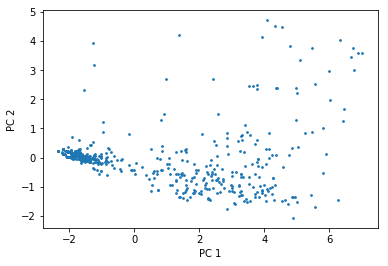

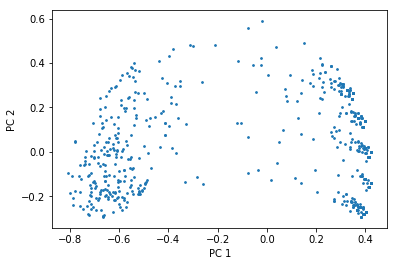

In [234]:
display_2d_pca(data_df)
display_2d_pca(data_df, kernel=1)

In [235]:
def display_2d_pca_with_colors(data, colors, kernel=0):
    if kernel == 0:
        components_dataframe = perform_pca(data, 2)
    else:
        components_dataframe = perform_kernel_pca(data, 2)

    plt.scatter(components_dataframe[0], components_dataframe[1], c=colors, s=3)   
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()
    return    

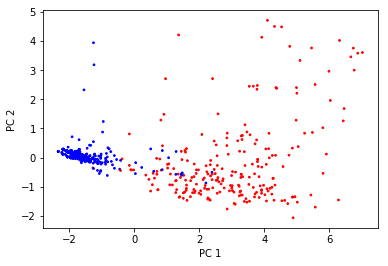

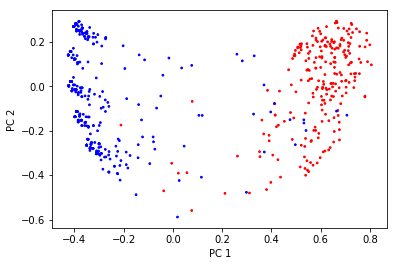

In [237]:
display_2d_pca_with_colors(data_df, colors)
display_2d_pca_with_colors(data_df, colors, kernel=1)

In [238]:
def display_3d_pca(data, kernel=0):
    if kernel == 0:
        components_dataframe = perform_pca(data, 3)
    else:
        components_dataframe = perform_kernel_pca(data, 3)
        
    ax = plt.axes(projection='3d')
    ax.scatter3D(components_dataframe[0], components_dataframe[1], components_dataframe[2], s=3);
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    
    plt.show()
    return    


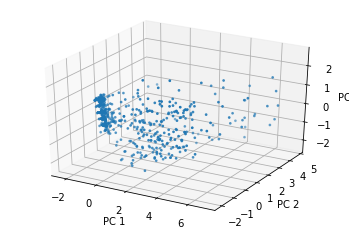

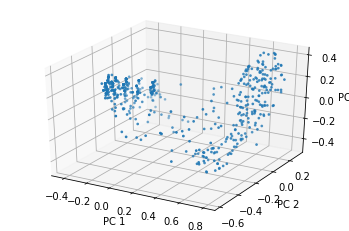

In [239]:
display_3d_pca(data_df)
display_3d_pca(data_df, kernel=1)

In [240]:
def display_3d_pca_with_colors(data, colors, kernel=0):
    if kernel == 0:
        components_dataframe = perform_pca(data, 3)
    else:
        components_dataframe = perform_kernel_pca(data, 3)

    ax = plt.axes(projection='3d')
    ax.scatter3D(components_dataframe[0], components_dataframe[1], components_dataframe[2], c=colors, s=3);
    ax.set_xlabel('PC 1')
    ax.set_ylabel('PC 2')
    ax.set_zlabel('PC 3')
    
    plt.show()
    return    

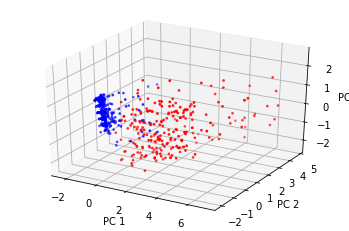

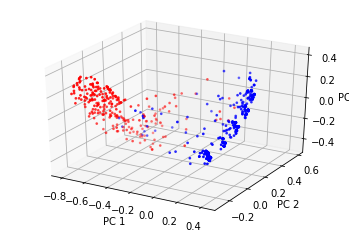

In [241]:
display_3d_pca_with_colors(data_df, colors)
display_3d_pca_with_colors(data_df, colors, kernel=1)

In [324]:
def display_scree_plot(data, kernel=0, number_of_components=None, percentage=True):  
    # scaling data so that every gene has similar weight
    scaler = StandardScaler()
    with warnings.catch_warnings(record=True):
        scaled_data = scaler.fit_transform(data)
    
    if kernel == 0:
        pca = PCA(n_components=number_of_components)
        components = pca.fit_transform(scaled_data)
        if percentage:
            bar_heights = pca.explained_variance_ratio_
            bar_heights = list(map(lambda x: x * 100, bar_heights))
            plt.ylabel("[%]")
        else:
            bar_heights = pca.explained_variance_
            
    else:
        kpca = KernelPCA(kernel="rbf", n_components=number_of_components)
        components = kpca.fit_transform(scaled_data)
        bar_heights = kpca.lambdas_
        if percentage:
            sum_of_variances = sum(bar_heights)
            bar_heights = list(map(lambda x: x * 100 / sum_of_variances, bar_heights))
            plt.ylabel("[%]")

    bar_x_coordinates = np.array(range(len(bar_heights)))
    labels = ['PC ' + str(i) for i in range(1, len(bar_heights) + 1)]
    
    plt.bar(bar_x_coordinates, bar_heights, tick_label=labels)
    plt.show()
    return
    

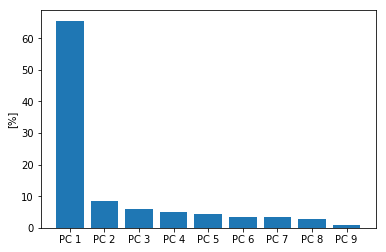

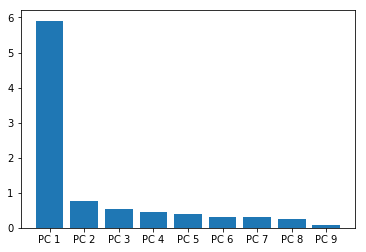

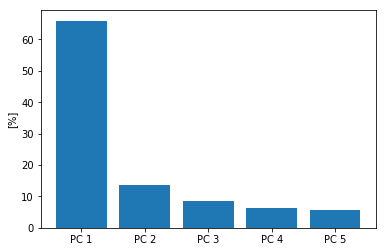

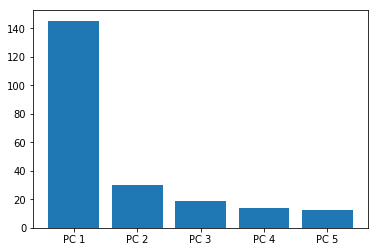

In [325]:
display_scree_plot(data_df)
display_scree_plot(data_df, percentage=False)
display_scree_plot(data_df, kernel=1, number_of_components=5)
display_scree_plot(data_df, kernel=1, number_of_components=5, percentage=False)


# Scree Plot is a graphical representation of the percentages of variation that each PC accounts for

In [7]:
def knn(samples, labels, n_neighbours):
    
    nbrs = NearestNeighbors(n_neighbours, algorithm='brute').fit(samples)
    distances, indices = nbrs.kneighbors(samples)
    
    neighbour_stats = []
    
    for index, neighbours in enumerate(indices):
        same_cluster_neighbours = filter(
            lambda neighbour: labels[neighbour] == labels[index],
            neighbours
        )
        neighbour_stats.append(len(list(same_cluster_neighbours)) / n_neighbours)
        
    return neighbour_stats, distances, indices

In [8]:
stats, dists, ind = knn(filtered.iloc[:, :9].values, filtered.iloc[:, 9].values, 5)
stats = np.array(stats)
np.mean(stats)

0.9674963396778917

In [9]:
rak = [True if cl == 2 else False for cl in filtered['class']]
rak
kek = []
for i, neighbours_list in enumerate(ind):
    kek.append([])
    for neighbour in neighbours_list:
            kek[i].append(rak[neighbour])
kek[:5]



[[True, True, True, True, True],
 [True, False, False, False, False],
 [True, True, True, True, True],
 [True, False, False, False, False],
 [True, True, True, True, True]]

In [10]:
stats[:5]

array([1. , 0.2, 1. , 0.2, 1. ])

In [11]:
ind[:5]

array([[ 95, 545, 263, 197, 521],
       [  1, 173, 319, 303, 151],
       [  2, 308, 117, 638,  76],
       [  3,  54,  47, 412,  53],
       [  4,  46, 234, 191, 648]])

In [12]:
ind[:5]

array([[ 95, 545, 263, 197, 521],
       [  1, 173, 319, 303, 151],
       [  2, 308, 117, 638,  76],
       [  3,  54,  47, 412,  53],
       [  4,  46, 234, 191, 648]])

In [13]:
dists[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.82842712, 4.        , 4.12310563, 4.47213595],
       [0.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 4.47213595, 4.69041576, 4.89897949, 5.56776436],
       [0.        , 0.        , 1.41421356, 1.41421356, 1.41421356]])

In [14]:
dists[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 2.82842712, 4.        , 4.12310563, 4.47213595],
       [0.        , 1.        , 1.        , 1.        , 1.        ],
       [0.        , 4.47213595, 4.69041576, 4.89897949, 5.56776436],
       [0.        , 0.        , 1.41421356, 1.41421356, 1.41421356]])

In [15]:
scaled = StandardScaler().fit_transform(filtered.iloc[:, :9].values)
scaled

/home/jakub/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jakub/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.18182716,
        -0.28510482, -0.34839971],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.18182716,
        -0.61292736, -0.34839971],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  1.86073779,
         2.33747554,  0.22916583],
       [-0.15686934,  1.58320366,  0.93248739, ...,  2.67776377,
         1.02618536, -0.34839971],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  2.67776377,
         0.37054027, -0.34839971]])

In [16]:
stats, dists, ind = knn(scaled, filtered.iloc[:, 9].values, 10)
stats = np.array(stats)
np.mean(stats)

0.958125915080527

In [17]:
ind[:5]

array([[545,   0, 197, 521, 263,  95, 546,  80, 666, 522],
       [  1, 173, 303, 142, 319,  84, 109, 121,  56, 151],
       [  2, 188, 382, 271, 308, 125, 638, 250, 651, 162],
       [  3,  54,  47, 412, 251,  53, 247, 675,  44, 221],
       [  4,  46, 191,  79, 487, 648, 238, 234, 655, 435]])

In [18]:
pca = PCA(n_components=2)
comp = pca.fit_transform(scaled)
comp_df = pd.DataFrame(data=comp)
comp_df.head()

,0,1
0,-1.470171,-0.104273
1,1.442046,-0.570141
2,-1.592478,-0.076120
3,1.479812,-0.528452
4,-1.344862,-0.090719


In [19]:
pca = PCA(n_components=9)
pca.fit_transform(scaled)
bar_height = pca.explained_variance_ratio_
print(bar_height)
np.sum(bar_height)

[0.65549993 0.08621632 0.05991692 0.05106972 0.04225287 0.03354183
 0.03271141 0.02897065 0.00982036]


1.0

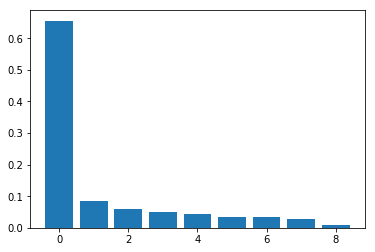

In [20]:
plt.bar(np.arange(9), bar_height)
plt.show()

In [21]:
stats, dists, ind = knn(comp_df.values, filtered.iloc[:, 9].values, 10)
np.array(stats)
np.mean(stats)

0.9597364568081991

In [22]:
comp_df['class'] = filtered['class'].values
comp_df.head()

,0,1,class
0,-1.470171,-0.104273,2
1,1.442046,-0.570141,2
2,-1.592478,-0.076120,2
3,1.479812,-0.528452,2
4,-1.344862,-0.090719,2


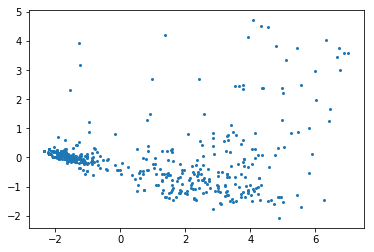

In [23]:
plt.scatter(comp_df.iloc[:, 0], comp_df.iloc[:, 1], s=4)

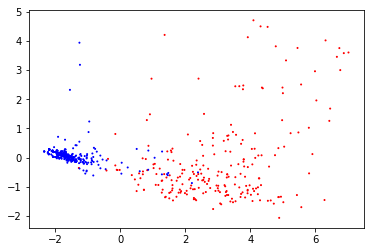

In [24]:
colors = ['blue' if cl == 2 else 'red' for cl in comp_df['class']]
plt.scatter(comp_df.iloc[:, 0], comp_df.iloc[:, 1], c=colors, s=1)

In [25]:
kpca = KernelPCA(kernel="rbf", n_components=2)
comp2 = kpca.fit_transform(scaled)
comp_df2 = pd.DataFrame(data=comp2, columns=['principal component 1', 'principal component 2'])
comp_df2.head()

,principal component 1,principal component 2
0,0.324448,0.279847
1,-0.532380,0.165591
2,0.384024,0.029997
3,-0.531882,0.151138
4,0.322221,0.177062


In [26]:
comp_df2['class'] = filtered['class'].values
comp_df2.head()

,principal component 1,principal component 2,class
0,0.324448,0.279847,2
1,-0.532380,0.165591,2
2,0.384024,0.029997,2
3,-0.531882,0.151138,2
4,0.322221,0.177062,2


In [27]:
stats, dists, ind = knn(comp_df2.values, filtered.iloc[:, 9].values, 5)
stats = np.array(stats)
np.mean(stats)

1.0

In [28]:
dists[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.01446177, 0.03455634, 0.05848812, 0.10344544],
       [0.        , 0.00293393, 0.00861998, 0.01062986, 0.01107697],
       [0.        , 0.01446177, 0.04878671, 0.05597761, 0.11700818],
       [0.        , 0.        , 0.0200575 , 0.02175245, 0.02371444]])

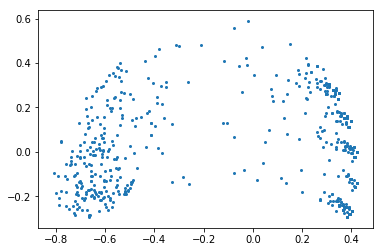

In [29]:
plt.scatter(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], s=4)
plt.show()

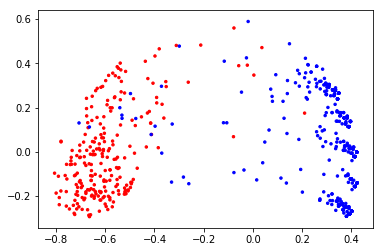

In [30]:
colors = ['blue' if cl == 2 else 'red' for cl in comp_df2['class']]
plt.scatter(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], c=colors, s=6)

<IPython.core.display.Javascript object>


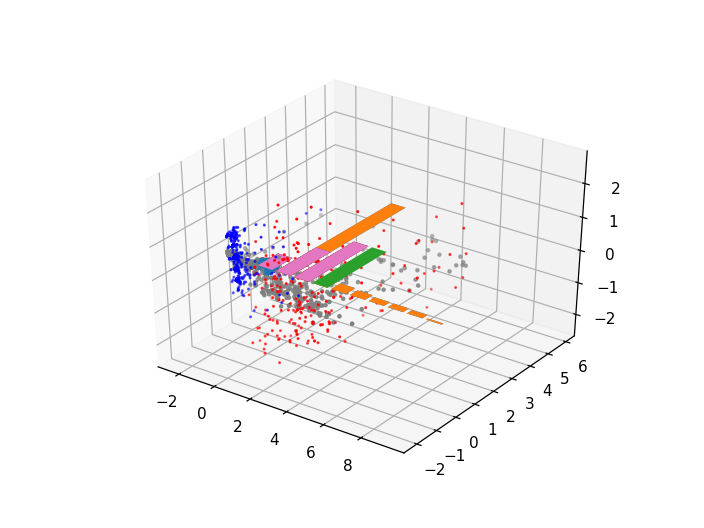

In [69]:
%matplotlib notebook



pca = PCA(n_components=3)
comp = pca.fit_transform(scaled)
comp_df = pd.DataFrame(data=comp, columns=['pc1', 'pc2', 'pc3'])

ax = plt.axes(projection='3d')
ax.scatter3D(comp_df.iloc[:, 0], comp_df.iloc[:, 1], comp_df.iloc[:, 2], c=colors, s=1);

<IPython.core.display.Javascript object>


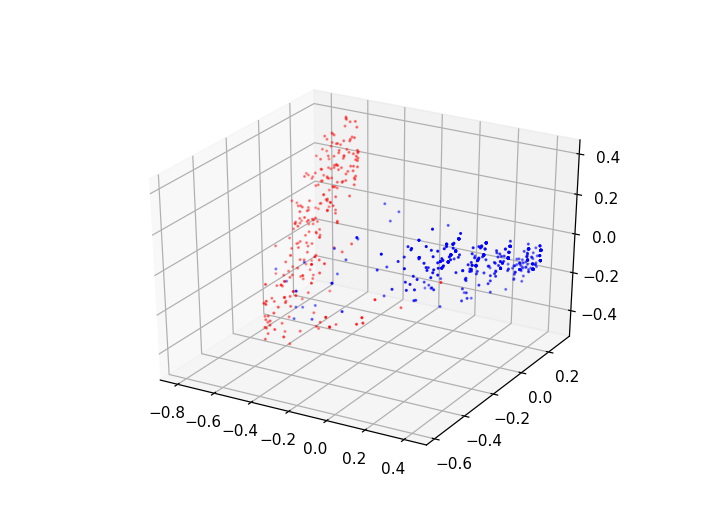

In [31]:
%matplotlib notebook

kpca = KernelPCA(kernel="rbf", n_components=3)
comp2 = kpca.fit_transform(scaled)
comp_df2 = pd.DataFrame(data=comp2, columns=['pc1', 'pc2', 'pc3'])

ax = plt.axes(projection='3d')
ax.scatter3D(comp_df2.iloc[:, 0], comp_df2.iloc[:, 1], comp_df2.iloc[:, 2], c=colors, s=1);